# Build a spam classifier using Naive Bayes

## Project Description: 
- There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). 
- Analyse, clean and visualise these datasets.
- Combine them into one big data set for the training
- Use this dataset in order to build your own Naive Bayes classifier. (You can either use existing Naive Bayes from sklearn or build your own one)
- Verify your Classifier using new messages (create your own messages or use the messages from the TestDataset.csv dataset).

## Project Duration: 2 weeks
## Project Deliverables:
1. End of the first week do Data preprocessing: 
    - Load the dataset using pandas, 
    - Analysis it for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words. (Research how to do this) 
    - Visualise the results
    - Prepare the pre-processed data for the usage by Naive Bayes Classifier
2. End of the second week:
    - Train the classifier,
    - Validate it, build confusion matrix, analyse its results
    - Apply it to new test messages,
    - Try to cheat the classifier by adding "good words" to the end of test message.

You can use the following link can be used as guidance for implementation:
https://towardsdatascience.com/spam-filtering-using-naive-bayes-98a341224038

### Matriculation number: 9038585
### Name: Manoj Kolpe Lingappa

In [26]:
import csv
from glob import glob 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# Read the csv files using pandas
traindata1 = pd.read_csv("TrainDataset1.csv")
traindata1.to_csv("Trainingdataset1.csv")
traindata2 = pd.read_csv("TrainDataset2.csv")
traindata2.rename(columns = {"v1":"type","v2":"text" }, inplace =True)
traindata2.to_csv("Trainingdataset2.csv")
testdata = pd.read_csv("TestDataset.csv")
words = open("TrainDataset3.txt").read().splitlines()
label = []
message = []
for i in words:
    processed_word = i.split("\t")
    label.append(processed_word[0])
    message.append(processed_word[1])
with open("TrainDataset3.csv", 'w', newline='') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(["type","text"])
    for i in range(len(label)):
        thewriter.writerow([label[i],message[i]])
traindata3 = pd.read_csv("TrainDataset3.csv")
traindata3.to_csv("Trainingdataset3.csv")
stock_files = sorted(glob("Trainingdataset*.csv"))
print(stock_files)
Trainingdata = pd.concat((pd.read_csv(file).assign(filename=file)
                         for file in stock_files), ignore_index=True)
Trainingdata = Trainingdata.drop(Trainingdata.columns[[0,1,2]],axis = 1)
Trainingdata.to_csv("mergeddataset.csv",index=False)
Trainingdata.head()

['Trainingdataset1.csv', 'Trainingdataset2.csv', 'Trainingdataset3.csv']


/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



text  type
0  U were outbid by simonwatson5120 on the Shinco...  spam
1                     Do you still have the grinder?   ham
2                     No. Yes please. Been swimming?   ham
3    No de.am seeing in online shop so that i asked.   ham
4  Faith makes things possible,Hope makes things ...   ham

In [27]:
# Describe Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution
trainingdataset = pd.read_csv("mergeddataset.csv")
trainingdataset.head()

text  type
0  U were outbid by simonwatson5120 on the Shinco...  spam
1                     Do you still have the grinder?   ham
2                     No. Yes please. Been swimming?   ham
3    No de.am seeing in online shop so that i asked.   ham
4  Faith makes things possible,Hope makes things ...   ham

In [28]:
trainingdataset.describe()

text   type
count                    14488  14488
unique                    5622      2
top     Sorry, I'll call later    ham
freq                        86  12563

In [29]:
trainingdataset.groupby('type').describe()

text                                                               
      count unique                                                top freq
type                                                                      
ham   12563   4784                             Sorry, I'll call later   86
spam   1925    838  Camera - You are awarded a SiPix Digital Camer...    9

In [30]:
# Create new column called "length" and apply the len function to the text column.
trainingdataset["length"] = trainingdataset["text"].apply(len)
trainingdataset.head(n=10)

text  type  length
0  U were outbid by simonwatson5120 on the Shinco...  spam     133
1                     Do you still have the grinder?   ham      30
2                     No. Yes please. Been swimming?   ham      30
3    No de.am seeing in online shop so that i asked.   ham      47
4  Faith makes things possible,Hope makes things ...   ham     133
5                            Hey u still at the gym?   ham      23
6                  Where is that one day training:-)   ham      33
7  Did I forget to tell you ? I want you , I need...   ham     142
8         I dont thnk its a wrong calling between us   ham      42
9  December only! Had your mobile 11mths+? You ar...  spam     157

(array([1.770e+02, 2.550e+02, 1.940e+03, 1.860e+03, 1.438e+03, 1.142e+03,
        7.950e+02, 8.090e+02, 6.030e+02, 5.740e+02, 3.860e+02, 3.960e+02,
        4.220e+02, 4.060e+02, 4.850e+02, 5.470e+02, 9.340e+02, 7.840e+02,
        1.140e+02, 7.700e+01, 3.200e+01, 3.800e+01, 2.400e+01, 9.000e+00,
        2.000e+01, 2.800e+01, 2.200e+01, 8.000e+00, 9.000e+00, 6.000e+00,
        3.200e+01, 8.000e+00, 1.700e+01, 5.000e+00, 2.000e+00, 1.300e+01,
        6.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 7.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 3.000e+00,
        9.000e+00, 4.000e+00, 6.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

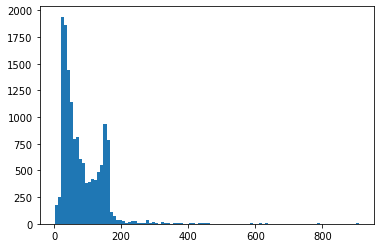

In [31]:
# Visualizing the distribution of length using histogram
plt.hist(trainingdataset["length"], 100)

In [32]:
trainingdataset.length.describe()

count    14488.000000
mean        80.286582
std         59.886021
min          2.000000
25%         36.000000
50%         62.000000
75%        122.000000
max        910.000000
Name: length, dtype: float64

In [33]:
# Finding the text having length of 910 using iloc in pandas
trainingdataset[trainingdataset["length"]==910]["text"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [34]:
# The data is in text format. The classification task need numeric feature vectors in the form of numbers. So we need to 
# convert our corpera to feature vectors. One simple method would be "bag of approach", where each unique word is
# represented by one number.
# Here raw messages(sequence of messages) to vector(sequence of number)
# NLTK library is used for removing the stopwords. 
# We can remove the punctuation from a message by using the string() library

def process(words):
    nopunctu = [i for i in words if i not in string.punctuation]
    nopunctu = ''.join(nopunctu)
    return [k for k in nopunctu.split() if k.lower() not in stopwords.words("english")]

# new = 'hello dlkfjgdlfk?....'
# process(new)



In [35]:
# Now we have to tkoenize the text
# There is numerous way we can normalize the words either by using steeming or part of speech
# Sometimes it's nltk tool don't work well because of usage of shorthand or abbreviation. Ex. Hey was'up
# Now we have each of tokens of message need to be converted into vector for learning using scikit leran in three step.
# 1. Count how many times does a word occur in each message (Known as term frequency)
# 2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
# 3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
# Step 1
# Number of dimension is equal to number of words in the corpus.
# Scikit learn Countvectorizer covnvert the collection of text documents into matrix of token counts.
# We have 2D vector space, 1 is the entire vocabulary other is actual document.
# Because there is lot of messages we will get many zero count for presence of that word in the document.That's why Scikit learn will produce sparse matrix
# bow = bag of words

bow_transform = CountVectorizer().fit(trainingdataset["text"])
# bow_transform = CountVectorizer().fit(testdata["v2"])
print(len(bow_transform.vocabulary_))
print(bow_transform)

8767
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [36]:
message1 = trainingdataset["text"][4]
print(message1)
# message1 = "hello, how, my name is billa valke ella"

Faith makes things possible,Hope makes things work,Love makes things beautiful,May you have all three this Christmas!Merry Christmas!


In [37]:
bow4 = bow_transform.transform([message1])
print(bow4)
print(bow4.shape)
print(bow_transform.get_feature_names()[229])
print(bow_transform.get_feature_names()[356])
print(bow_transform.get_feature_names()[8627]) 
# Here first column is the position of the word and second column is the number of times word is repeated in message1.

  (0, 1043)	1
  (0, 1462)	1
  (0, 2064)	2
  (0, 3133)	1
  (0, 3808)	1
  (0, 3959)	1
  (0, 4792)	1
  (0, 4902)	3
  (0, 4983)	1
  (0, 5043)	1
  (0, 6032)	1
  (0, 7741)	3
  (0, 7751)	1
  (0, 7769)	1
  (0, 8578)	1
  (0, 8705)	1
(1, 8767)
09061743386
150ppermesssubscription
wtlp


In [38]:
text_bow = bow_transform.transform(trainingdataset["text"])
print("Shape of sparse matrix.", text_bow.shape)
print("Number of non zero occurences.", text_bow.nnz)

Shape of sparse matrix. (14488, 8767)
Number of non zero occurences. 192453


In [39]:
# In numerical analysis and scientific computing, a sparse matrix or sparse array is a matrix in which most of the
# elements are zero. By contrast, if most of the elements are nonzero, then the matrix is considered dense. 
# The number of zero-valued elements divided by the total number of elements 
# (e.g., m × n for an m × n matrix) is called the sparsity of the matrix 
# (which is equal to 1 minus the density of the matrix). 
# Using those definitions, a matrix will be sparse when its sparsity is greater than 0.5.
sparsity =(100.0 * text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [40]:
# weighting and normalization is done with the help of TF-IDF(term freuency and Inverse document frequency)
# Weight is a statistical measure of how important a word is for a documentin a corpus.
# A word importance increases as number of times it appear in the document but is offsetted frequency number in the corpus.
# Usually TF-IDF is used by search engines for ranking and scoring documents to show result for a query.
# TF-IDF weight is made up of two terms: First is normalized term frequency(N-TF) i.e number of times a word occur
# in a document to total number of terms in the document.Second is IDF, computed as the logarithm of the number 
# of the documents in the corpus divided by the number of documents where the specific term appears.
# TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
# Normalization is done for TF because number of times word occur changes as length of message changes.
# IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
# IDF will let us weight the importance of certain word, because some words may appera many times such as "a","be"
# which is of low importance hence need to be weighed less.
# Ex.Consider a document containing 100 words wherein the word cat appears 3 times.
# The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents 
# and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is 
# calculated as log(10,000,000 / 1,000) = 4.
# Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
tfid_transformer = TfidfTransformer().fit(text_bow)
tfid_message1 = tfid_transformer.transform(bow4)
print(tfid_message1)

  (0, 8705)	0.06169158534235719
  (0, 8578)	0.13798830045302007
  (0, 7769)	0.22299790296607458
  (0, 7751)	0.1048530443549801
  (0, 7741)	0.47641189493061215
  (0, 6032)	0.20410927406067444
  (0, 5043)	0.19852851751883147
  (0, 4983)	0.15857005340115776
  (0, 4902)	0.5344995843316507
  (0, 4792)	0.12144094688800114
  (0, 3959)	0.1337407500449679
  (0, 3808)	0.09148330923783803
  (0, 3133)	0.23531473770562764
  (0, 2064)	0.3950749597896546
  (0, 1462)	0.18066833260055135
  (0, 1043)	0.11159049575590801


In [41]:
# We can compute the tfidf value for two words "hi" and "hint"
print(tfid_transformer.idf_[bow_transform.vocabulary_['hi']])
print(tfid_transformer.idf_[bow_transform.vocabulary_['hint']])

4.803492696598066
8.97170710738662


In [42]:
text_tfidf = tfid_transformer.transform(text_bow)
print(text_tfidf.shape)

(14488, 8767)


In [43]:
# We have fitted the type to multinomial naive bayes classifier
detector = MultinomialNB().fit(text_tfidf,trainingdataset["type"])

In [44]:
print("Predicted:", detector.predict(tfid_message1)[0])
print("Actual:", traindata1.type[4])

Predicted: ham
Actual: ham


In [45]:
# Evaluation of model
# We will do all the prediction

all_predict = detector.predict(text_tfidf)
print(all_predict)

['spam' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [46]:
# We can use the scikit learn tool to find  precision, recall, f1-score, 
# and a column for support (meaning how many cases supported that classification)
# The evaluation model is depend on the task at hand. For ex. cost of predicting spam as ham is less compared to
# predicting ham as spam
print(classification_report(trainingdataset["type"],all_predict))
print(confusion_matrix(trainingdataset["type"],all_predict))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99     12563
        spam       1.00      0.93      0.97      1925

    accuracy                           0.99     14488
   macro avg       0.99      0.97      0.98     14488
weighted avg       0.99      0.99      0.99     14488

[[12562     1]
 [  128  1797]]


In [47]:
# Now we can test our trained model on the testing data
pipeline = Pipeline([('bow', CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [48]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [49]:
# pipeline.fit(testdata['text'],testdata['type']
pipeline.fit(trainingdataset['text'],trainingdataset['type'])
predict = pipeline.predict(testdata['v2'])
# print(classification_report(predict,))
print(Counter(predict))

Counter({'ham': 973, 'spam': 142})


In [50]:
# Splitting the dataset for training and testing in 70/30 ratio
text_train,text_test,type_train,type_test = train_test_split(trainingdataset['text'],trainingdataset['type'],test_size=0.3)
print(len(text_train),len(text_test),len(type_train),len(type_test))

10141 4347 10141 4347


In [51]:
pipeline.fit(text_train,type_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [52]:
# Training the model
prediction = pipeline.predict(text_test)

In [53]:
# Classification report
# confusion matrix
print(classification_report(prediction, type_test))
print(confusion_matrix(prediction, type_test))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      3824
        spam       0.91      1.00      0.95       523

    accuracy                           0.99      4347
   macro avg       0.95      0.99      0.97      4347
weighted avg       0.99      0.99      0.99      4347

[[3770   54]
 [   0  523]]


* In the above confusion matrix we have 
* True positive of 3770 here the observation is postive and prediction is also postive.
* False negative is 54 where Observation is positive, but is predicted negative.
* False positive is 0 so Observation is negative, and is predicted to be negative.
* True negative is 523  Observation is negative, but is predicted positive.

In [64]:
# adding good words and trying to cheat
# message2 = "Faith makes things possible,Hope makes things work,Love makes things beautiful,May you have all three this Christmas!Merry Christmas! Please reply to the same mail"
message2 = "HSE University’s Master of Data Science hosted on Coursera is the first fully online, English-taught data science Master’s from a top 10 Russian university."
print(message2)
bow5 = bow_transform.transform([message2])
tfid_message2 = tfid_transformer.transform(bow5)
print("Predicted:", detector.predict(tfid_message2)[0])

HSE University’s Master of Data Science hosted on Coursera is the first fully online, English-taught data science Master’s from a top 10 Russian university.
Predicted: ham
